## XAI(eXplainable AI)
- 사용자가 기계학습 알고리즘에 의해 생성된 결과와 출력을 이해하고 신뢰할 수 있는 프로세스/방법론
- 모델을 기획(plan)하고 수립(build)할 때 고려하는 사항은 속도, 정확도, 해석력
 - 세 가지 요소는 상충 관계(trade-off)
 - 속도와 정확도를 동시에 높인다면, 그만큼 모델이 복잡해져 해석력 감소
 - XAI는 해석력과 관련된 내용: 해석력도 동시에 높이기 위해 사용
- 해석력(Explainability, Interpretability)
 - Global/Local 해석력 존재

### XAI ICE 구현을 위한 환경설정
1. Jupyter Notebook 종료
2. Anaconda Prompt 관리자 권한 실행
3. Scikit-learn 버전 재설치
 - pip install scikit-learn==0.24.1
 - 다른 버전에서 작동하지 않을 수 있으므로 정상 작동 확인된 버전으로 설치
4. 설치 후 Jupyter Notebook 재시작

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# XAI: 학습된 모델 필요
from sklearn.ensemble import RandomForestRegressor as rf

df = pd.read_csv('test1_modified_6.csv')

label = 'regular'
features = ['year', 'month', 'day', 'hour',
            'dayofweek', 'windforce', 'discomfort']

X, y = df[features], df[label]
model = rf()
model.fit(X, y)

RandomForestRegressor()

### XAI 알고리즘
- PDP
- SHAP

#### 기존 시각화 예시: 변수(feature)와 레이블의 관계를 시각화

<AxesSubplot:xlabel='hour', ylabel='regular'>

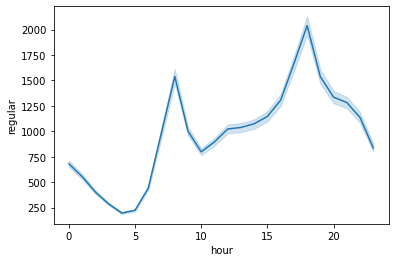

In [3]:
sns.lineplot(data=df, x='hour', y='regular')

# PDP는 레이블을 입력하지 않고 모델의 예측값을 이용
# 알고리즘이 제대로 학습했다면 출력된 그래프를 이해하고 있을 것이라고 가정
# 즉, 시간대에 따른 이용량 추이가 보이는 경향을 알고리즘도 알고 있다는 컨셉

### PDP(Partial Dependence Plot, 부분 의존도)
- Feature 수치를 선형적으로 변형하면서 알고리즘 해석 능력이 얼마나 증가/감소하는지 관찰하는 방식
- Feature/Label 관계를 부분적으로 확인
 - 전체 feature를 살피는 것이 아니라, 일부 feature만 선택하여 레이블에 어떤 영향을 미치는지 확인
- 참고 자료
 - Zhao et el(2019) - Casual Interpretation of black-box models
 - Wright et el - Interpreting black box machine learning model ~ SAS Institute
 - Goldstein et el(2015) - Peeking inside the Black Box

C:\Users\Shiwon Kim\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_partial_dependence is deprecated; Function `plot_partial_dependence` is deprecated in 1.0 and will be removed in 1.2. Use PartialDependenceDisplay.from_estimator instead
  warnings.warn(msg, category=FutureWarning)
C:\Users\Shiwon Kim\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_partial_dependence is deprecated; Function `plot_partial_dependence` is deprecated in 1.0 and will be removed in 1.2. Use PartialDependenceDisplay.from_estimator instead
  warnings.warn(msg, category=FutureWarning)


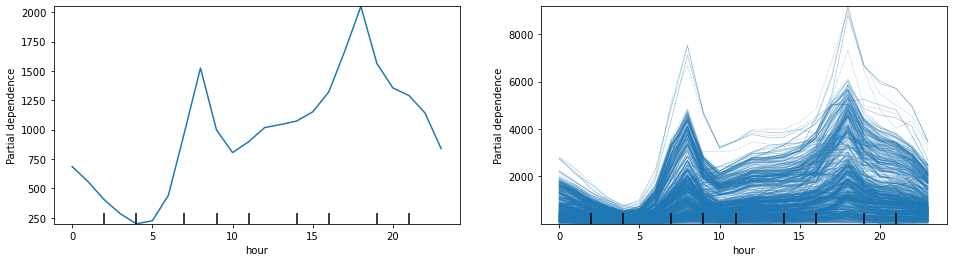

In [4]:
from sklearn.inspection import plot_partial_dependence as pdp

fig, (ax1, ax2) = plt.subplots(ncols=2)
fig.set_size_inches(16, 4)

target = 'hour'

# target: 리스트 형태로 입력
# kind: average(default), individual
pdp(model, X, [target], kind='average', ax=ax1) # PDP plot
pdp(model, X, [target], kind='individual', ax=ax2) # ICE plot

# 레이블을 입력하지 않았음에도 유사한 형태의 그래프 반환
# ICE plot -> 각각의 행을 개별적으로 시각화
# PDP plot -> 컬럼의 평균값으로 시각화

#### PDP/ICE 해석
- ICE(Individual Conditional Expectations)
- PDP/ICE 도출 과정
 - 하나의 행에 대하여 특정 컬럼의 값만 변화시키며 모델의 예측/결과 값을 여러 개 도출
 - ICE: 각 행마다 도출된 선 그래프를 하나하나 따로 나타낸 것
 - PDP: ICE 그래프의 평균 형태
- one-way/two-way 방식
 - one-way: feature를 하나만 사용한 경우(위 예시는 hour 변수 기준의 one-way plot)
 - two-way: 두 개의 feature를 사용하여 분석

C:\Users\Shiwon Kim\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_partial_dependence is deprecated; Function `plot_partial_dependence` is deprecated in 1.0 and will be removed in 1.2. Use PartialDependenceDisplay.from_estimator instead
  warnings.warn(msg, category=FutureWarning)


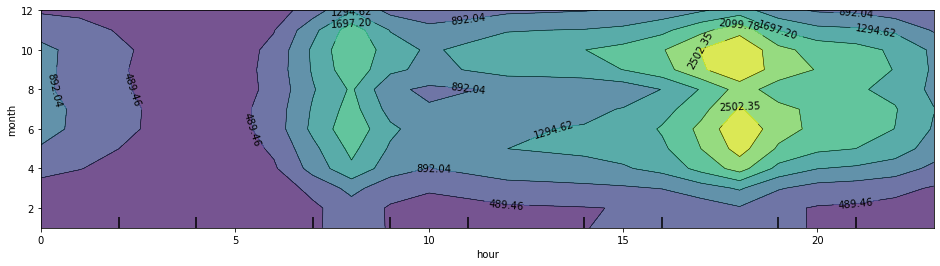

In [5]:
# two-way 방식: hour, month

fig, ax1 = plt.subplots()
fig.set_size_inches(16, 4)

target = ('hour', 'month')
pdp(model, X, [target], kind='average', ax=ax1) # PDP

# 시간에 따른 변화와 월에 따른 변화를 등고선 형태로 시각화

##### 해석 방법 #####

# 밝을수록 모델 예측값이 크고, 어두울수록 모델 예측값이 작음

# 월 정보를 기준으로 12월과 1~3월 부분이 어두움 -> 이용량이 적음
# 6~10월은 0~1시 정도의 늦은 밤/새벽에 약간의 이용량 존재

# 시간을 기준으로 7~8시, 월 정보와 함께 보면 6, 7, 9, 10월에 이용량이 좀 있음 
# (6~10월 중 8월 부분만 오목한 모래시계 형태)
# 1월과 2월은 여름 대비 이용량이 적음

In [6]:
# *핵심: 실제 레이블이 아닌 알고리즘의 예측값으로 시각화
# 학습된 모델이 특정 feature에 대하여 어떤 예측 결과를 내는 경향이 있는지 파악 가능

# 실무에서 모델의 해석력을 제고하기 위해 자주 사용되는 방식
# 모델의 예측을 뒷받침하는 근거 -> XAI도 데이터를 유사하게 설명하고 있음을 제시

### SHAP(SHapley Additive exPlanations)
- 게임 이론상 최적화된 shapley value를 찾는 것이 핵심
 - 예를 들어 스포츠 구단에서 각 선수들의 능력치/기여도를 수치화하여 평가
 - 각 선수의 승리 기여도가 어느 정도인지 판단하여 연봉을 책정
- shapley value: 선수들의 기여도를 능력/역량으로 수치화한 것
 - feature: 선수
 - label: 승리
- Global/Local 모두 가능

#### Reference
 - Shapley(1953), Lundberg(2017)

#### SHAP 프로세스
- 해석 대상인 행 i에서 컬럼(feature) j가 특정 값일 때의 shapley value 찾기
1. 필요한 요소
 - 학습이 완료된 모델 f
 - 해석하고자 하는 행 i
2. 데이터셋으로부터 랜덤한 행 z를 선택
3. i와 z를 모델 f에 넣고 예측값 도출(model.predict() 적용)
4. shapley value를 알아볼 특정 컬럼 j의 i, z행의 값을 맞교환
5. 4번 단계에서 맞교환한 i와 z를 모델 f에 넣고 예측값 도출
6. i행의 j값을 비교
 - 원본 예측값과 i와 z를 맞교환 했을 때의 예측값을 비교
7. z행의 j값을 비교
 - 원본 예측값과 z와 i를 맞교환 했을 때의 예측값을 비교
8. 2번부터 7번까지의 단계를 n회 반복하여 i행의 j값이 원본 예측값과 맞교환 예측값을 비교
9. 8번 단계에서 비교한 값들의 평균: shapley value
 - 원본 그대로일 때가 그렇지 않을 때 대비 평균적으로 예측값에 +/- 방향으로 얼마나 기여했는지 나타내는 수치
 - i, z별로 원본 예측값 대비 맞교환 예측값이 얼마나 +/- 되었는지에 대한 수치

#### SHAP 특징
- 한 행에 대하여 특정 컬럼의 맞교환 작업을 n회 반복 수행
 - 연산량이 많아 시간이 오래 소요되므로 전체 데이터셋을 대상으로 진행하기에는 제약이 존재
 - 실습은 일부 데이터를 대상으로 진행(5줄의 간격을 두고 추출)

#### Global Interpretability

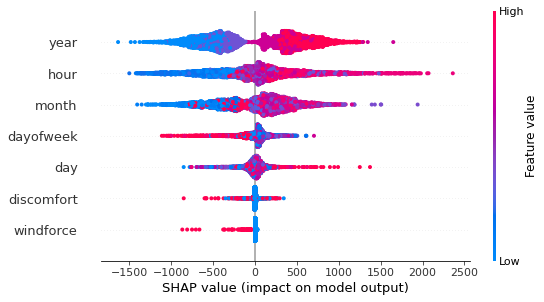

In [7]:
import shap

# 내부적으로 JavaScript를 이용하여 시각화 -> 활성화 작업
shap.initjs()

# .TreeExplainer(model) -> SHAP 개념으로 model 해석
# .shap_values(X[::5]) -> X[::5] 데이터셋을 대상으로 shapley value를 도출
shap_values = shap.TreeExplainer(model).shap_values(X[::5])

# .summary_plot() -> shapley value들을 feature별로 요약 정리하는 그림
# feature와 label 간의 관계를 한 장의 그림으로 정리
shap.summary_plot(shap_values, X[::5]) # 해당 작업 30분 이상 소요

In [8]:
##### 해석 방법 #####

# 전체 컬럼을 대상으로 진행한 전역 해석력(Global Interpretability) 점검

# x축 shapley value, y축 feature
# Feature Value -> High(빨간색)부터 Low(파란색)까지 그라데이션 형식으로 표현

# 색상은 해당 컬럼의 수치
# 빨간색일수록 큰 값, 파란색일수록 작은 값을 의미

# 개별 값에 대한 수많은 점들이 분포
# 점이 왼쪽에 위치할수록 예측값에 강한 - 영향
# 점이 오른쪽에 위치할수록 예측값에 강한 + 영향

# year의 경우 빨간색 점은 대부분 오른쪽에, 파란색 점은 왼쪽에 분포
# 연도가 최근에 가까울수록(year 값이 클수록) 예측값에 + 영향
# 반대로 year 컬럼의 값이 작을수록 예측에 - 영향

# dayofweek는 빨간색 점이 왼쪽에 많이 분포, 오른쪽은 다소 섞인 분포
# 요일 값이 클수록(주말에 가까울수록) 예측값에 - 영향

#### Local Interpretability
- 모델 예측 결과의 전반이 아닌 하나의 행에 대하여 왜 이런 예측값을 도출했는지 해석

In [9]:
# 모델 학습
from sklearn.ensemble import RandomForestRegressor as rf

df = pd.read_csv('test1_modified_6.csv')

label = 'regular'
features = ['year', 'month', 'day', 'hour',
            'dayofweek', 'windforce', 'discomfort']

X, y = df[features], df[label]
model = rf()
model.fit(X, y)

RandomForestRegressor()

In [10]:
import shap

shap.initjs()
single_row = X.iloc[500]
single_row

year          2017
month            1
day             30
hour            17
dayofweek        0
windforce        0
discomfort       0
Name: 500, dtype: int64

In [11]:
explainer = shap.TreeExplainer(model)
single_val = explainer.shap_values(single_row)
shap.force_plot(explainer.expected_value, single_val, single_row)

# 하나의 행에 대한 예측 결과(82.56)를 해석
# 빨간색은 예측값에 + 영향을, 파란색은 예측값에 - 영향을 미친 것으로 해석
# hour=17이면 빨간색 정도의 + 영향, year=2017, month=1이면 파란색 정도의 - 영향
# +/- 영향이 적절히 조합되어 도출된 예측값이 82.56

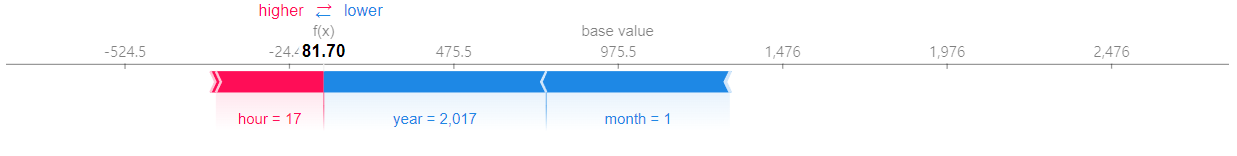